<h1>Exemplo de classificação de texto com Sklearn</h1>

In [321]:
import json

raw_file = open('datasets/reviews.json', 'r', encoding='utf-8').read()
as_json = json.loads(raw_file)
num_texts = len(as_json['paper'])

print(num_texts)

172


In [312]:
as_json

{'paper': [{'id': 1,
   'preliminary_decision': 'accept',
   'review': [{'confidence': '4',
     'evaluation': '1',
     'id': 1,
     'lan': 'es',
     'orientation': '0',
     'remarks': '',
     'text': '- El artículo aborda un problema contingente y muy relevante, e incluye tanto un diagnóstico nacional de uso de buenas prácticas como una solución (buenas prácticas concretas). - El lenguaje es adecuado.  - El artículo se siente como la concatenación de tres artículos diferentes: (1) resultados de una encuesta, (2) buenas prácticas de seguridad, (3) incorporación de buenas prácticas. - El orden de las secciones sería mejor si refleja este orden (la versión revisada es #2, #1, #3). - El artículo no tiene validación de ningún tipo, ni siquiera por evaluación de expertos.',
     'timespan': '2010-07-05'},
    {'confidence': '4',
     'evaluation': '1',
     'id': 2,
     'lan': 'es',
     'orientation': '1',
     'remarks': '',
     'text': 'El artículo presenta recomendaciones práctic

In [266]:
#Observando os dados

entries = [j for j in as_json['paper']]
entries[0]

{'id': 1,
 'preliminary_decision': 'accept',
 'review': [{'confidence': '4',
   'evaluation': '1',
   'id': 1,
   'lan': 'es',
   'orientation': '0',
   'remarks': '',
   'text': '- El artículo aborda un problema contingente y muy relevante, e incluye tanto un diagnóstico nacional de uso de buenas prácticas como una solución (buenas prácticas concretas). - El lenguaje es adecuado.  - El artículo se siente como la concatenación de tres artículos diferentes: (1) resultados de una encuesta, (2) buenas prácticas de seguridad, (3) incorporación de buenas prácticas. - El orden de las secciones sería mejor si refleja este orden (la versión revisada es #2, #1, #3). - El artículo no tiene validación de ningún tipo, ni siquiera por evaluación de expertos.',
   'timespan': '2010-07-05'},
  {'confidence': '4',
   'evaluation': '1',
   'id': 2,
   'lan': 'es',
   'orientation': '1',
   'remarks': '',
   'text': 'El artículo presenta recomendaciones prácticas para el desarrollo de software seguro. S

In [313]:
' '.join([x['text'] for x in entries[0]['review']])

'- El artículo aborda un problema contingente y muy relevante, e incluye tanto un diagnóstico nacional de uso de buenas prácticas como una solución (buenas prácticas concretas). - El lenguaje es adecuado.  - El artículo se siente como la concatenación de tres artículos diferentes: (1) resultados de una encuesta, (2) buenas prácticas de seguridad, (3) incorporación de buenas prácticas. - El orden de las secciones sería mejor si refleja este orden (la versión revisada es #2, #1, #3). - El artículo no tiene validación de ningún tipo, ni siquiera por evaluación de expertos. El artículo presenta recomendaciones prácticas para el desarrollo de software seguro. Se describen las mejores prácticas recomendadas para desarrollar software que sea proactivo ante los ataques, y se realiza un análisis de costos de estas prácticas en desarrollo de software. Todo basado en una revisión de prácticas propuestas en la bibliografía y su contraste con datos obtenidos de una encuesta en empresas. Finalmente 

In [314]:
import numpy as np

texts = [' '.join([x['text'] for x in j['review']]) for j in entries]
classifications = [j['preliminary_decision'] for j in entries]

class_set = list(set(classifications))
print('SET classifications', class_set)

numeric_classifications = [class_set.index(c) for c in classifications]

Y = np.array(numeric_classifications).ravel()

SET classifications ['accept', 'no decision', 'reject', 'probably reject']


In [276]:
k = np.ones((35, 1))

In [278]:
k.ravel()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [271]:
class_set

['accept', 'no decision', 'reject', 'probably reject']

In [272]:
class_set.index('reject')

2

<h3>Criação de features numéricas</h3>

In [315]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_1 = CountVectorizer()
vectorizer_2 = TfidfVectorizer()

X_1 = vectorizer_1.fit_transform(texts)
X_2 = vectorizer_2.fit_transform(texts)

Exemplo

In [320]:
print(X_1.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [282]:
X_1[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [284]:
np.sum(X_2[0].todense())

9.32219792867043

In [126]:
np.sum(X_1[0].todense())

363

<h3>Teste dos classificadores</h3>

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y, 
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True,
                                                    random_state=42)

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y, 
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True,
                                                    random_state=42)

model1_1 = GaussianNB()
model1_2 = GaussianNB()
model2_1 = LogisticRegression()
model2_2 = LogisticRegression()
model3_1 = MLPClassifier((10,), activation='logistic')
model3_2 = MLPClassifier((10,), activation='logistic')

model1_1.fit(X_train_1.todense(), Y_train_1)
model1_2.fit(X_train_2.todense(), Y_train_2)
model2_1.fit(X_train_1, Y_train_1)
model2_2.fit(X_train_2, Y_train_2)
model3_1.fit(X_train_1, Y_train_1)
model3_2.fit(X_train_2, Y_train_2)

accuracy1_1 = model1_1.score(X_test_1.todense(), Y_test_1)
accuracy1_2 = model1_2.score(X_test_2.todense(), Y_test_2)
accuracy2_1 = model2_1.score(X_test_1, Y_test_1)
accuracy2_2 = model2_2.score(X_test_2, Y_test_2)
accuracy3_1 = model3_1.score(X_test_1, Y_test_1)
accuracy3_2 = model3_2.score(X_test_2, Y_test_2)

print('Accuracy GaussianNB + CountVectorizer', accuracy1_1)
print('Accuracy GaussianNB + Tfidf', accuracy1_2)
print('Accuracy LogisticRegression + CountVectorizer', accuracy2_1)
print('Accuracy LogisticRegression + Tfidf', accuracy2_2)
print('Accuracy MLPClassifier + CountVectorizer', accuracy3_1)
print('Accuracy MLPClassifier + Tfidf', accuracy3_2)

prediction = model2_1.predict(X_test_1)
cm = confusion_matrix(Y_test_1, prediction)
print('Confusion matrix', cm)

/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy GaussianNB + CountVectorizer 0.5384615384615384
Accuracy GaussianNB + Tfidf 0.5192307692307693
Accuracy LogisticRegression + CountVectorizer 0.7115384615384616
Accuracy LogisticRegression + Tfidf 0.6730769230769231
Accuracy MLPClassifier + CountVectorizer 0.6538461538461539
Accuracy MLPClassifier + Tfidf 0.6730769230769231
Confusion matrix [[31  0  4  0]
 [ 1  0  0  0]
 [ 8  0  6  0]
 [ 1  0  1  0]]


<h2>Atividade: Substitua a representacao bag of words pela proporcao de cada palavra e realize os testes</h2>

In [305]:
x_1 = [x.todense()/np.sum(x) for x in X_1]

/Users/fnba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [306]:
x_1 = np.vstack(x_1)
np.shape(x_1)

(172, 6704)

In [307]:
x_1 = np.nan_to_num(x_1, 0.0)

In [308]:
np.sum(x_1[0])

1.0

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x_1, Y, 
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True,
                                                    random_state=42)
model1_1 = GaussianNB()
model2_1 = LogisticRegression()
model3_1 = MLPClassifier((10,), activation='logistic')

model1_1.fit(X_train_1, Y_train_1)
model2_1.fit(X_train_1, Y_train_1)
model3_1.fit(X_train_1, Y_train_1)

accuracy1_1 = model1_1.score(X_test_1, Y_test_1)
accuracy2_1 = model2_1.score(X_test_1, Y_test_1)
accuracy3_1 = model3_1.score(X_test_1, Y_test_1)

print('Accuracy GaussianNB + CountVectorizer', accuracy1_1)
print('Accuracy LogisticRegression + CountVectorizer', accuracy2_1)
print('Accuracy MLPClassifier + CountVectorizer', accuracy3_1)


Accuracy GaussianNB + CountVectorizer 0.5384615384615384
Accuracy LogisticRegression + CountVectorizer 0.6730769230769231
Accuracy MLPClassifier + CountVectorizer 0.6730769230769231


/Users/fnba/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [289]:
x_soma = [np.sum(x) for x in X_1]
x_1_1 = [x/x_soma[i] for i, x in enumerate(X_1)]

/Users/fnba/anaconda3/lib/python3.7/site-packages/scipy/sparse/base.py:580: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)


In [291]:
np.shape(x_1_1)

(172,)

<h2>Atividade: Crie um classificador para diferenciar pessoas fisicas ou juridicas</h2>

In [326]:
import urllib.request

url = 'https://www.econodata.com.br/consulta-cnae/A016-ATIVIDADES-DE-APOIO-A-AGRICULTURA-E-A-PECUARIA-ATIVIDADES-DE-POS-COLHEITA/PERNAMBUCO/RECIFE'
custom_headers = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' }

#req_obj = urllib.request.Request(url, headers=custom_headers)
#response = urllib.request.urlopen(req_obj)

raw_html = raw_html = urllib.request.urlopen(url).read()#response.read()

print('HTML fetched')
soup = Soup(raw_html)
all_lis = soup.findAll('li')
all_companies = []

for ti in tqdm(all_lis):
    all_a = ti.findAll('a')
    if len(all_a) > 0:
        all_companies.append(all_a[0].text)
all_companies

HTML fetched


100%|██████████| 2166/2166 [00:00<00:00, 25859.00it/s]


['PROSPECTING PLATFORM',
 'LEAD ENRICHMENT',
 'ABOUT US',
 'MATERIALS',
 'PLATFORM ACCESS',
 'LISTAS DE EMPRESAS',
 'CALCULADORA DE MERCADO',
 'SETORES DA ECONOMIA',
 'CONSULTA CNAE',
 'BUSCA EMPRESA',
 'BLOG DA PROSPECÇÃO',
 'BEIRA RIO AGRICOLA E COMERCIAL S.A.',
 'VALE DOURADO NEGOCIOS LTDA',
 'PECUARIA RIO LARGO LTDA',
 'CIA MERCANTIL E AGRICOLA',
 'VALEMONTE EMPREENDIMENTOS E PARTICIPACOES S.A.',
 'TECMARES MARICULTURA LTDA - EPP',
 'GRANENGE CONSULTORIA PROJETOS E PARTICIPACOES LTDA - ME',
 'MS TRATORES E MAQUINAS LTDA - ME',
 'SANTOS MEDEIROS TRATORES E MAQUINAS LTDA - ME',
 'ODAIR TRATORES E MAQUINAS LTDA - ME',
 'S. H. EMPREENDIMENTOS IMOBILIARIOS LTDA - ME',
 'CCL MECANIZACAO AGRICOLA LTDA - ME',
 'SENAR DEDETIZACOES LTDA - ME',
 'PLANOTEC PLANEJAMENTO A ASSIST TEC AGROPECUARIA LTDA - ME',
 'DG ASSISTENCIA TECNICA AGRICOLA LTDA - ME',
 'GMARIZ MAO DE OBRA ESPECIALIZADA LTDA',
 'C&C SERVICOS E SERRALHERIA LTDA - ME',
 'HARAS CONEXAO LTDA - ME',
 'AGROPECUARIA VALE DO JEQUITINHO

In [328]:
all_companies = [c for c in all_companies if c != ' Ver empresas\n\t\t\t\t\t\t\t\t\t']
all_companies

['PROSPECTING PLATFORM',
 'LEAD ENRICHMENT',
 'ABOUT US',
 'MATERIALS',
 'PLATFORM ACCESS',
 'LISTAS DE EMPRESAS',
 'CALCULADORA DE MERCADO',
 'SETORES DA ECONOMIA',
 'CONSULTA CNAE',
 'BUSCA EMPRESA',
 'BLOG DA PROSPECÇÃO',
 'BEIRA RIO AGRICOLA E COMERCIAL S.A.',
 'VALE DOURADO NEGOCIOS LTDA',
 'PECUARIA RIO LARGO LTDA',
 'CIA MERCANTIL E AGRICOLA',
 'VALEMONTE EMPREENDIMENTOS E PARTICIPACOES S.A.',
 'TECMARES MARICULTURA LTDA - EPP',
 'GRANENGE CONSULTORIA PROJETOS E PARTICIPACOES LTDA - ME',
 'MS TRATORES E MAQUINAS LTDA - ME',
 'SANTOS MEDEIROS TRATORES E MAQUINAS LTDA - ME',
 'ODAIR TRATORES E MAQUINAS LTDA - ME',
 'S. H. EMPREENDIMENTOS IMOBILIARIOS LTDA - ME',
 'CCL MECANIZACAO AGRICOLA LTDA - ME',
 'SENAR DEDETIZACOES LTDA - ME',
 'PLANOTEC PLANEJAMENTO A ASSIST TEC AGROPECUARIA LTDA - ME',
 'DG ASSISTENCIA TECNICA AGRICOLA LTDA - ME',
 'GMARIZ MAO DE OBRA ESPECIALIZADA LTDA',
 'C&C SERVICOS E SERRALHERIA LTDA - ME',
 'HARAS CONEXAO LTDA - ME',
 'AGROPECUARIA VALE DO JEQUITINHO

In [334]:
def all_upper(my_str):
    return my_str.upper() == my_str and len(my_str) > 0

all_companies = [c for c in all_companies if all_upper(c)]
all_companies

['PROSPECTING PLATFORM',
 'LEAD ENRICHMENT',
 'ABOUT US',
 'MATERIALS',
 'PLATFORM ACCESS',
 'LISTAS DE EMPRESAS',
 'CALCULADORA DE MERCADO',
 'SETORES DA ECONOMIA',
 'CONSULTA CNAE',
 'BUSCA EMPRESA',
 'BLOG DA PROSPECÇÃO',
 'BEIRA RIO AGRICOLA E COMERCIAL S.A.',
 'VALE DOURADO NEGOCIOS LTDA',
 'PECUARIA RIO LARGO LTDA',
 'CIA MERCANTIL E AGRICOLA',
 'VALEMONTE EMPREENDIMENTOS E PARTICIPACOES S.A.',
 'TECMARES MARICULTURA LTDA - EPP',
 'GRANENGE CONSULTORIA PROJETOS E PARTICIPACOES LTDA - ME',
 'MS TRATORES E MAQUINAS LTDA - ME',
 'SANTOS MEDEIROS TRATORES E MAQUINAS LTDA - ME',
 'ODAIR TRATORES E MAQUINAS LTDA - ME',
 'S. H. EMPREENDIMENTOS IMOBILIARIOS LTDA - ME',
 'CCL MECANIZACAO AGRICOLA LTDA - ME',
 'SENAR DEDETIZACOES LTDA - ME',
 'PLANOTEC PLANEJAMENTO A ASSIST TEC AGROPECUARIA LTDA - ME',
 'DG ASSISTENCIA TECNICA AGRICOLA LTDA - ME',
 'GMARIZ MAO DE OBRA ESPECIALIZADA LTDA',
 'C&C SERVICOS E SERRALHERIA LTDA - ME',
 'HARAS CONEXAO LTDA - ME',
 'AGROPECUARIA VALE DO JEQUITINHO

In [336]:
import pickle
corpus = pickle.load(open('datasets/name_company_corpus.pickle', 'rb'))

corpus

[['jessie bonot albuquerque', 'NAME'],
 ['athron', 'COMPANY'],
 ['gisele franceschetto [sem sobrenome]', 'NAME'],
 ['josuana ton maretto', 'NAME'],
 ['balduino calvi silotti', 'NAME'],
 ['imexla imp exp latino americana ltd', 'COMPANY'],
 ['masculinos marcon de alvarenga', 'NAME'],
 ['eh bombas hidraulicas ltda', 'COMPANY'],
 ['hebe pazetto lay', 'NAME'],
 ['vwb ind com imp exp prod magn ltda', 'COMPANY'],
 ['taynara zucoloto rossoni', 'NAME'],
 ['torquear comercio servs e repr ltda', 'COMPANY'],
 ['star business i c equips indls ltda', 'COMPANY'],
 ['sergio gasparello colodeta', 'NAME'],
 ['fischer industria mecanica ltda', 'COMPANY'],
 ['satellite automacao ltda', 'COMPANY'],
 ['empral desenv de equipamentos ltda', 'COMPANY'],
 ['scheelita ind com ferramentas ltda', 'COMPANY'],
 ['fascitec instrum eletronica ltda', 'COMPANY'],
 ['meglio consultoria mark design ltda', 'COMPANY'],
 ['dominic cescon de sousa', 'NAME'],
 ['cris battistella voluzia', 'NAME'],
 ['greentec ind climatizadore

In [341]:
texts = [c[0] for c in corpus]
tags = [c[1] for c in corpus]
tags

['NAME',
 'COMPANY',
 'NAME',
 'NAME',
 'NAME',
 'COMPANY',
 'NAME',
 'COMPANY',
 'NAME',
 'COMPANY',
 'NAME',
 'COMPANY',
 'COMPANY',
 'NAME',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'NAME',
 'NAME',
 'COMPANY',
 'COMPANY',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'COMPANY',
 'NAME',
 'COMPANY',
 'NAME',
 'NAME',
 'NAME',
 'COMPANY',
 'COMPANY',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'COMPANY',
 'COMPANY',
 'NAME',
 'NAME',
 'COMPANY',
 'NAME',
 'COMPANY',
 'NAME',
 'NAME',
 'COMPANY',
 'COMPANY',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'COMPANY',
 'NAME',
 'NAME',
 'COMPANY',
 'NAME',
 'NAME',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'NAME',
 'NAME',
 'NAME',
 'COMPANY',
 'NAME',
 'NAME',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'NAME',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'NAME',
 'COMPANY',
 'COMPANY',
 'NAME',
 'COMPANY',
 'COMPANY',
 'COMPANY',
 'NAME',
 'COMPANY',
 'COMPANY',
 

In [344]:
all_tags = list(set(tags))
all_tags

['COMPANY', 'NAME']

In [347]:
tags_n = [all_tags.index(t) for t in tags]

In [354]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()

texts_train, texts_test, tags_train, tags_test = train_test_split(
    texts, tags_n, stratify=tags_n, shuffle=True, test_size=0.3)

In [359]:
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

model.fit(X_train, tags_train)
accuracy = model.score(X_test, tags_test)

prediction = model.predict(X_test)
cm = confusion_matrix(tags_test, prediction)

print('Accuracy', accuracy)
print('Confusion matrix', cm)

Accuracy 0.9918947648153069
Confusion matrix [[3868   58]
 [   3 3597]]


<h2>Atividade: Encontrar as palavras com maior ganho de informação</h2>

In [364]:
vectorizer.get_feature_names()

['100',
 '14',
 '1848',
 '19',
 '2000',
 '2001',
 '2003',
 '2007',
 '230',
 '31',
 '3357',
 '3551',
 '3d',
 '3r',
 '3s',
 '41',
 '430',
 '475',
 '61',
 'a3',
 'aaa',
 'aalborg',
 'aaron',
 'aas',
 'aatt',
 'ab',
 'ab1',
 'aba',
 'abadir',
 'abafer',
 'abafix',
 'abaine',
 'abal',
 'abast',
 'abastecimento',
 'abate',
 'abaurre',
 'abb',
 'abbott',
 'abbud',
 'abc',
 'abc71',
 'abcam',
 'abecassis',
 'abel',
 'abelardo',
 'abelino',
 'abelita',
 'abelt',
 'aberko',
 'abiel',
 'abiezer',
 'abigail',
 'abilio',
 'abim',
 'abimaq',
 'abipack',
 'abividro',
 'ablevision',
 'ablv',
 'abm',
 'abmateriais',
 'abner',
 'aborgama',
 'aboudib',
 'above',
 'abpex',
 'abpo',
 'abr',
 'abraao',
 'abracadeiras',
 'abragol',
 'abraman',
 'abrange',
 'abrantes',
 'abras',
 'abrascort',
 'abrasfer',
 'abrasivo',
 'abrasivos',
 'abravsteel',
 'abre',
 'abreu',
 'abs',
 'ac',
 'aca',
 'acab',
 'acabamento',
 'acabamentos',
 'acacia',
 'acacio',
 'academia',
 'acaf',
 'acatec',
 'acatolli',
 'acc',
 'acces

In [366]:
all_names = vectorizer.get_feature_names()
import random
random.shuffle(all_names)
sample = all_names[:100]

In [371]:
import pandas as pd

X_pd = pd.DataFrame(X_train.todense(), columns=vectorizer.get_feature_names())
X_pd['target'] = tags_train

X_pd.head()

100  14  1848  19  2000  2001  2003  2007  230  31   ...    zucoloto  \
0    0   0     0   0     0     0     0     0    0   0   ...           0   
1    0   0     0   0     0     0     0     0    0   0   ...           0   
2    0   0     0   0     0     0     0     0    0   0   ...           0   
3    0   0     0   0     0     0     0     0    0   0   ...           0   
4    0   0     0   0     0     0     0     0    0   0   ...           0   

   zulaia  zuleica  zuleima  zulianni  zum  zuqui  zurich  zwick  target  
0       0        0        0         0    0      0       0      0       0  
1       0        0        0         0    0      0       0      0       0  
2       0        0        0         0    0      0       0      0       1  
3       0        0        0         0    0      0       0      0       0  
4       0        0        0         0    0      0       0      0       0  

[5 rows x 13763 columns]

In [372]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_pd[sample], X_pd['target'])

mi

array([0.        , 0.        , 0.        , 0.00110738, 0.00053897,
       0.        , 0.00925113, 0.        , 0.00420317, 0.        ,
       0.        , 0.        , 0.        , 0.00593721, 0.00228049,
       0.        , 0.00094784, 0.        , 0.00425925, 0.        ,
       0.00132072, 0.00228532, 0.00699157, 0.00622788, 0.        ,
       0.        , 0.        , 0.        , 0.0060728 , 0.0036499 ,
       0.00361638, 0.        , 0.        , 0.00272919, 0.        ,
       0.00029809, 0.00448573, 0.00233526, 0.        , 0.        ,
       0.00319222, 0.        , 0.00469814, 0.00228825, 0.00374469,
       0.00447745, 0.        , 0.0027808 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00047384,
       0.00038696, 0.        , 0.00772996, 0.        , 0.        ,
       0.        , 0.00070821, 0.00339869, 0.        , 0.        ,
       0.        , 0.        , 0.00427431, 0.        , 0.        ,
       0.00401841, 0.00386669, 0.00441921, 0.        , 0.     

In [379]:
k = [[s, mi[i]] for i, s in enumerate(sample)]
sorted_k = sorted(k, key=lambda x: x[1], reverse=True)
sorted_k

[['prods', 0.009251125366555257],
 ['mendall', 0.008829985430928389],
 ['premero', 0.008678036781377907],
 ['bozzi', 0.008281476577438607],
 ['nakamurada', 0.007729958204431897],
 ['heckert', 0.007321542189362429],
 ['embal', 0.006991568857668717],
 ['cabur', 0.006276323144356333],
 ['msk', 0.006227880204379366],
 ['uniezzo', 0.006072796829377447],
 ['henrypack', 0.005937210192332731],
 ['cabinas', 0.005407166506783634],
 ['multpress', 0.005313066837734137],
 ['bioagri', 0.005114706255761714],
 ['busseti', 0.004698137778082367],
 ['auxiliadora', 0.004485733367862732],
 ['autocam', 0.004477450670062666],
 ['evangelina', 0.004419206186981883],
 ['jensen', 0.004274307505821806],
 ['patrick', 0.004265008813790772],
 ['universidade', 0.004259252365302668],
 ['bebedouros', 0.0042031670259494724],
 ['enterbrazil', 0.0040184142533359335],
 ['imports', 0.003866694139577742],
 ['sbetti', 0.0037918378863783797],
 ['balaska', 0.003744688181918976],
 ['gasparina', 0.003649896221917359],
 ['nn', 0.0

<h2>Atividade: Tentar melhorar o desempenho do classificador</h2>

<h1>Nltk</h1>

<a href="https://www.nltk.org/book/">Referência sobre Nltk</a>

O Nltk é uma biblioteca para processamento de texto natural em python. Com ela é possível realizar classificação de textos, treinar chunkers, entre outros

In [380]:
# -*- coding: utf-8 -*-

import nltk

Primeiramente, uma função bastante útil para o processamento de textos em português

In [385]:
from unicodedata import normalize

def normalize_text(text, to_lower=True):
    text = normalize('NFKD', text).encode('ASCII', 'ignore')

    final_text = text

    if to_lower:
        final_text = text.lower()
        
    return final_text.decode('utf-8')

In [389]:
normalize_text('Olá, tudo BeM ação')

'ola, tudo bem acao'

In [387]:
print(normalize_text('OlÁ, tudo bem? como você vai?'))
print(normalize_text('Olá, tudo bem? como você vai?', to_lower=False))

ola, tudo bem? como voce vai?
Ola, tudo bem? como voce vai?


Ao realizar a normalização de textos, considere excluir casos como o verbo de ligação "é" e o símbolo de parágrafo &para;

<h2>Baixando corpora e pacotes úteis</h2
<br><br>
Vamos agora baixar exemplos de textos em português para trabalhar e alguns pacotes que serão úteis

In [391]:
#Baixar: book
#Baixar: all-corpora
#Baixar: floresta
#Baixar: machado
#Baixar: punkt
#Baixar: stopwords

#Se houverem problemas com a interface. Abrir o terminal do Jupyter e inserir os comandos:
#python -m nltk downloader book
#python -m nltk downloader all-corpora
#python -m nltk.downloader floresta
#python -m nltk.downloader machado
#python -m nltk.downloader punkt
#python -m nltk.downloader stopwords
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

<h3>Carregando texto e funções úteis do NLTK</h3>

In [395]:
import nltk

f = open('datasets/machado.txt', 'r', encoding='utf-8').read()

In [398]:
f[:100]

'A Cartomante HAMLET observa a Horácio que há mais cousas no céu e na terra do que sonha a nossa filo'

In [400]:
nltk.word_tokenize(f)

['A',
 'Cartomante',
 'HAMLET',
 'observa',
 'a',
 'Horácio',
 'que',
 'há',
 'mais',
 'cousas',
 'no',
 'céu',
 'e',
 'na',
 'terra',
 'do',
 'que',
 'sonha',
 'a',
 'nossa',
 'filosofia',
 '.',
 'Era',
 'a',
 'mesma',
 'explicação',
 'que',
 'dava',
 'a',
 'bela',
 'Rita',
 'ao',
 'moço',
 'Camilo',
 ',',
 'numa',
 'sexta-feira',
 'de',
 'novembro',
 'de',
 '1869',
 ',',
 'quando',
 'este',
 'ria',
 'dela',
 ',',
 'por',
 'ter',
 'ido',
 'na',
 'véspera',
 'consultar',
 'uma',
 'cartomante',
 ';',
 'a',
 'diferença',
 'é',
 'que',
 'o',
 'fazia',
 'por',
 'outras',
 'palavras',
 '.',
 '—',
 'Ria',
 ',',
 'ria',
 '.',
 'Os',
 'homens',
 'são',
 'assim',
 ';',
 'não',
 'acreditam',
 'em',
 'nada',
 '.',
 'Pois',
 'saiba',
 'que',
 'fui',
 ',',
 'e',
 'que',
 'ela',
 'adivinhou',
 'o',
 'motivo',
 'da',
 'consulta',
 ',',
 'antes',
 'mesmo',
 'que',
 'eu',
 'lhe',
 'dissesse',
 'o',
 'que',
 'era',
 '.',
 'Apenas',
 'começou',
 'a',
 'botar',
 'as',
 'cartas',
 ',',
 'disseme',
 ':',
 '

In [401]:
tokens = nltk.word_tokenize(f)
my_txt = nltk.Text(tokens)
my_txt

<Text: A Cartomante HAMLET observa a Horácio que há...>

<h3>Fazendo pesquisas textuais</h3>

In [402]:
my_txt.concordance('observa')

Displaying 1 of 1 matches:
 observa a Horácio que há mais cousas no céu


In [406]:
my_txt.concordance('olhos')

Displaying 2 of 2 matches:
te sem demora , — repetia ele com os olhos no papel . Imaginariamente , viu a p
avras estavam decoradas , diante dos olhos , fixas , ou então , — o que era ain


<h3>Obtendo a distribuição de palavras</h3>

In [404]:
from nltk.probability import FreqDist
fd = FreqDist(my_txt)

In [407]:
fd['olhos']

2

In [409]:
items = fd.items()

In [411]:
sorted(items, key=lambda x: x[1], reverse=True)

[(',', 177),
 ('.', 83),
 ('que', 58),
 ('a', 55),
 ('e', 51),
 ('de', 42),
 ('o', 29),
 (';', 26),
 ('Camilo', 20),
 ('as', 16),
 ('da', 15),
 ('—', 14),
 ('não', 13),
 ('era', 13),
 ('do', 12),
 ('por', 12),
 ('em', 12),
 ('ele', 11),
 ('casa', 11),
 ('com', 11),
 ('uma', 10),
 ('já', 10),
 ('para', 10),
 ('A', 9),
 ('mais', 9),
 ('na', 9),
 ('Rita', 9),
 ('ao', 9),
 ('mas', 9),
 ('Vilela', 9),
 ('à', 9),
 ('é', 8),
 ('lhe', 8),
 (':', 8),
 ('...', 8),
 ('!', 8),
 ('cartomante', 7),
 ('os', 7),
 ('sem', 7),
 ('um', 7),
 ('no', 6),
 ('nada', 6),
 ('ela', 6),
 ('Não', 6),
 ('mesmo', 5),
 ('eu', 5),
 ('cartas', 5),
 ('algum', 5),
 ('depois', 5),
 ('?', 5),
 ('vez', 5),
 ('ou', 5),
 ('se', 5),
 ('outro', 5),
 ('ser', 5),
 ('tempo', 5),
 ('rua', 5),
 ('cousas', 4),
 ('nossa', 4),
 ('quando', 4),
 ('ria', 4),
 ('assim', 4),
 ('``', 4),
 ("''", 4),
 ('então', 4),
 ('medo', 4),
 ('como', 4),
 ('tudo', 4),
 ('foi', 4),
 ('pouco', 4),
 ('das', 4),
 ('Vem', 4),
 ('idéia', 4),
 ('tílburi', 4),
 

<h3>Encontrando um texto dentro de outro</h3>

In [412]:
import re

txt1 = 'Este eh um texto onde a palavra texto acontece mais de uma vez'

[(x.start(), x.end()) for x in re.finditer('texto', txt1)]

[(11, 16), (32, 37)]

In [414]:
txt1[32:37]

'texto'

<h3>Stopwords em português</h3>

In [416]:
stopwords = nltk.corpus.stopwords.words('portuguese')
len(stopwords)

203

In [419]:
def remove_stopwords(text):
    return ' '.join([t for t in nltk.word_tokenize(text) 
            if t not in stopwords])
remove_stopwords('fui no shopping com maria e pedro')

'shopping maria pedro'

<h2>Segmentação de texto</h2>

<h3>Tokenização</h3>
<br>
Tokenização é o processo de dividir uma frase em palavras particulares


In [46]:
nltk.word_tokenize('meu nome é felipe navarro')

['meu', 'nome', 'é', 'felipe', 'navarro']

<h3>Segmentação em sentenças (sent tokenization)</h3>
<br>
É o processo de quebrar um texto grande em frases individuais


In [421]:
sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')

texto = 'Meu nome é dr. João da Silva e gosto de passear no feriado. Recentemente comprei um carro, que quebrou ontem'

sent_tokenizer.tokenize(texto)


['Meu nome é dr. João da Silva e gosto de passear no feriado.',
 'Recentemente comprei um carro, que quebrou ontem']

In [422]:
#Para simplificar vamos criar funções

def tokens(my_str):
    return nltk.word_tokenize(my_str)

def sent_seg(my_str):
    return sent_tokenizer.tokenize(texto)

<h3>Stemming em portugues</h3>

In [426]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("despersonalizar")

'despersonal'

<h2>Funções úteis em portugues com spacy</h2>

In [427]:
#Rodar o comando pip install spacy
#Rodar o comando python -m spacy download pt
import spacy
nlp = spacy.load('pt')
my_doc = nlp('Encontrarei você no mesmo lugar onde ele estava. Tudo bem?')

<h3>Separação em tokens</h3>

In [428]:
my_doc.text.split()

['Encontrarei',
 'você',
 'no',
 'mesmo',
 'lugar',
 'onde',
 'ele',
 'estava.',
 'Tudo',
 'bem?']

In [429]:
[token.orth_ for token in my_doc]

['Encontrarei',
 'você',
 'no',
 'mesmo',
 'lugar',
 'onde',
 'ele',
 'estava',
 '.',
 'Tudo',
 'bem',
 '?']

<h3>Classificação sintática com spacy</h3>

In [430]:
[(token.orth_, token.pos_) for token in my_doc]

[('Encontrarei', 'VERB'),
 ('você', 'PRON'),
 ('no', 'VERB'),
 ('mesmo', 'DET'),
 ('lugar', 'NOUN'),
 ('onde', 'ADV'),
 ('ele', 'PRON'),
 ('estava', 'VERB'),
 ('.', 'PUNCT'),
 ('Tudo', 'PRON'),
 ('bem', 'ADV'),
 ('?', 'PUNCT')]

<h3>Lemmatizer em português</h3>

In [438]:
test_verb = nlp('encontrarei, faremos, encontro')
[token.lemma_ for token in test_verb]

['encontrar', ',', 'fazer', ',', 'encontrar']

<h3>Reconhecimento de nome e entidade com o Spacy</h3>

In [447]:
test_ner = nlp('Steve Jobs é presidente da Apple')
test_ner.ents

(Steve Jobs, Apple)

In [448]:
[(entity, entity.label_) for entity in test_ner.ents]

[(Steve Jobs, 'PER'), (Apple, 'ORG')]

In [449]:
from spacy import displacy

In [451]:
displacy.render(test_ner,style='ent', jupyter=True)

<h2>Classificação sintática</h2>

<h3>Visualizando corpus taggeado</h3>

In [453]:
from nltk.corpus import floresta
#Visualizando as palavras
print(floresta.words()[:10])

print('----------')
#Com tags
print(floresta.tagged_words()[:10])

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', 'é', 'um', 'ex-libris', 'de', 'a']
----------
[('Um', '>N+art'), ('revivalismo', 'H+n'), ('refrescante', 'N<+adj'), ('O', '>N+art'), ('7_e_Meio', 'H+prop'), ('é', 'P+v-fin'), ('um', '>N+art'), ('ex-libris', 'H+n'), ('de', 'H+prp'), ('a', '>N+art')]


In [458]:
k = 'Art'
k.split('+')[1]

IndexError: list index out of range

In [459]:
def simple_tag(tag):
    try:
        return tag.split('+')[1]
    except:
        return tag

simple_tag('>N+art')

'art'

In [460]:
tagged_sents = floresta.tagged_sents()

In [463]:
tagged_sents[1]

[('O', '>N+art'),
 ('7_e_Meio', 'H+prop'),
 ('é', 'P+v-fin'),
 ('um', '>N+art'),
 ('ex-libris', 'H+n'),
 ('de', 'H+prp'),
 ('a', '>N+art'),
 ('noite', 'H+n'),
 ('algarvia', 'N<+adj'),
 ('.', '.')]

In [27]:
#Observando por sentenças
tagged_sents = floresta.tagged_sents()

for sent in tagged_sents[:10]:
    print(sent)
    print('--------')

[('Um', '>N+art'), ('revivalismo', 'H+n'), ('refrescante', 'N<+adj')]
--------
[('O', '>N+art'), ('7_e_Meio', 'H+prop'), ('é', 'P+v-fin'), ('um', '>N+art'), ('ex-libris', 'H+n'), ('de', 'H+prp'), ('a', '>N+art'), ('noite', 'H+n'), ('algarvia', 'N<+adj'), ('.', '.')]
--------
[('É', 'P+v-fin'), ('uma', 'H+num'), ('de', 'H+prp'), ('as', '>N+art'), ('mais', '>A+adv'), ('antigas', 'H+adj'), ('discotecas', 'H+n'), ('de', 'H+prp'), ('o', '>N+art'), ('Algarve', 'H+prop'), (',', ','), ('situada', 'P+v-pcp'), ('em', 'H+prp'), ('Albufeira', 'P<+prop'), (',', ','), ('que', 'SUBJ+pron-indp'), ('continua', 'AUX+v-fin'), ('a', 'PRT-AUX<+prp'), ('manter', 'MV+v-inf'), ('os', '>N+art'), ('traços', 'H+n'), ('decorativos', 'N<+adj'), ('e', 'CO+conj-c'), ('as', '>N+art'), ('clientelas', 'H+n'), ('de', 'H+prp'), ('sempre', 'P<+adv'), ('.', '.')]
--------
[('É', 'P+v-fin'), ('um_pouco', 'ADVL+adv'), ('a', '>N+art'), ('versão', 'H+n'), ('de', 'H+prp'), ('uma', '>N+art'), ('espécie', 'H+n'), ('de', 'H+prp'),

In [464]:
#Criando sentenças simplificadas
simplified_sents = [[(n, simple_tag(t)) for n, t in sent] for sent in tagged_sents]

In [468]:
def simplify_sent(sent):
    return [(n, simple_tag(t)) for n, t in sent]
k = tagged_sents[0]

In [471]:
simplified_sents = [simplify_sent(sent) for sent in tagged_sents]

In [472]:
simplified_sents[:2]

[[('Um', 'art'), ('revivalismo', 'n'), ('refrescante', 'adj')],
 [('O', 'art'),
  ('7_e_Meio', 'prop'),
  ('é', 'v-fin'),
  ('um', 'art'),
  ('ex-libris', 'n'),
  ('de', 'prp'),
  ('a', 'art'),
  ('noite', 'n'),
  ('algarvia', 'adj'),
  ('.', '.')]]

In [35]:
simplified_sents[0]

[('Um', 'art'), ('revivalismo', 'n'), ('refrescante', 'adj')]

In [479]:
import random
random.shuffle(simplified_sents)

num_sents = len(simplified_sents)
len_train = int(num_sents*0.8)

train = simplified_sents[:len_train]
test = simplified_sents[len_train:]

<h3>Treinando POS taggers</h3>

In [480]:
from nltk.metrics import accuracy

tagger0 = nltk.DefaultTagger('n')

print('Acuracia default tagger', tagger0.evaluate(test))

tagger1 = nltk.UnigramTagger(train, backoff=tagger0)

print('Acuracia unigram tagger', tagger1.evaluate(test))

tagger2 = nltk.BigramTagger(train, backoff=tagger1)

print('Acuracia bigram tagger', tagger2.evaluate(test))

Acuracia default tagger 0.18971798026585607
Acuracia unigram tagger 0.8832838773491593
Acuracia bigram tagger 0.8991339171551953


In [482]:
tagger2.tag(nltk.word_tokenize('eu sou felipe navarro'))

[('eu', 'pron-pers'), ('sou', 'v-fin'), ('felipe', 'n'), ('navarro', 'n')]

<h3>Testando</h3>

In [48]:
tagger2.tag(tokens('eu sou felipe navarro'))

[('eu', 'pron-pers'), ('sou', 'v-fin'), ('felipe', 'n'), ('navarro', 'n')]

<h2>Atividade: Treine um classificador sintatico com os dados do laboratorio NILC</h2>
    
<a href='http://www.nilc.icmc.usp.br/nilc/tools/nilctaggers.html'>Ver aqui</a>

In [129]:
#dica, abrir o arquivo dessa forma:

#raw = open(file_name, 'r').read().decode('latin-1').encode('utf-8')

<h2>Chunkers</h2>

<h3>Contrução de uma base de dados para um Chunker em portugues</h3>

<a href="https://www.linguateca.pt/primeiroHAREM/harem_coleccaodourada_en.html">Fonte inicial</a>

In [496]:
from bs4 import BeautifulSoup as Soup

raw_xml = open('datasets/ColeccaoDouradaHAREM.txt', 'r', encoding='latin-1').read()
raw_xml = raw_xml.replace('|', ' ')
raw_xml = normalize_text(raw_xml)
print(raw_xml[:300])

<doc>
<docid>harem-871-07800</docid>
<genero>web</genero>
<origem>pt</origem>
<texto>
<organizacao tipo="instituicao" morf="f,s">abraco</organizacao> pagina principal
<organizacao tipo="instituicao" morf="f,s">associacao de apoio a pessoas com vih/sida</organizacao>
a <organizacao tipo="instituicao"


In [ ]:
'eu|O sou|O felipe|B navarro|I'

In [491]:
soup = Soup(raw_xml)
all_textos = soup.findAll('texto')

num_textos = len(all_textos)
print('Num textos', num_textos)

texts_with_people = []

for ctext in all_textos:
    people = ctext.findAll('pessoa')
    if len(people) > 1:
        texts_with_people.append([ctext.text, [p.text for p in people]])

print('Num textos com pessoas', len(texts_with_people))

Num textos 129
Num textos com pessoas 78


In [495]:
texts_with_people[2]

['\n historico esta secao traz de volta um pouco da longa historia do dcc.\no dcc- departamento de cultura cientifica do centro academico pereira barretto (dcc/capb), orgao responsavel pela representacao e encaminhamento cientifico dos alunos da unifesp/epm, fundado em 1937, atua junto aos alunos promovendo varios cursos extracurriculares, palestras, conferencias e discussoes de interesse a area medica.\norganiza o premio "pereira barretto", importante e conceituada premiacao anual de trabalhos cientificos academicos, o congresso academico paulista de medicina (capm), cursos de computacao, cursos de idiomas e revista cientifica.\ndcc - como comecou os alunos sempre estiveram envolvidos na estruturacao da escola paulista de medicina.\npoucos anos apos sua fundacao as atividades estudantis se intensificaram.\no dcc surge em cinco de maio de 1937|cinco de maio de 1937 gracas ao apoio de professores e ao espirito virtuoso de academicos que, no afa de realizar algo mais do que apenas seguir

In [524]:
soup = Soup(raw_xml)

all_textos = soup.findAll('texto')
num_textos = len(all_textos)
print('Num textos', num_textos)
print('....')
texts_with_people = []

for ctext in all_textos:
    people = ctext.findAll('pessoa')
    if len(people) > 1:
        texts_with_people.append([ctext.text, [p.text for p in people]])

print('Num textos com pessoas', len(texts_with_people))

Num textos 129
....
Num textos com pessoas 78


In [71]:
texts_with_people[0]

['\nfernando ferreira\n[click for a page in english]\ncmaf- universidade de lisboa gabinete a2-31 avenida professor gama pinto, 2 telefone do gabinete: 217904893 p-1649-003 lisboa extensao interna: 4293 portugal email: ferferr@cii.fc.ul.pt departamento de matematica faculdade de ciencias universidade de lisboa cmaf\napresentacao\nbem vindos aminha pagina pessoal. sou professor associado do departamento de matematica da universidade de lisboa e membro do centro de matematica e aplicacoes fundamentais - cmaf. clique aqui para obter o meu cv.\ninteresses academicos\nlogica matematica, em especial teorias fracas da aritmetica e da analise. filosofia  e fundamentos de matematica . tenho um interesse amador (no sentido latino da palavra) por alguns problemas da filosofia antiga , particularmente no problema da falsidade em parmenides e platao. tambem escrevi alguns ensaios expositorios sobre temas da logica: clique aqui para os ver.\nensino\nno presente semestre dou aulas teorico-praticas de

In [525]:
def create_tagged_people_names(name, tag_name):
    tokens = nltk.word_tokenize(name)
    first_token = tokens[0] +'|B-' +tag_name
    
    middle_tokens = tokens[1:]
    return ' '.join([first_token] + [t+'|I-'+tag_name for t in middle_tokens]) + ' '

create_tagged_people_names('felipe navarro balbino alves', 'nome')

def create_fully_tagged_text(full_text, names, tag_name):
    tagged_names = [create_tagged_people_names(n, tag_name) for n in names]
    modified_text = full_text
    
    for i, name in enumerate(names):
        modified_text = modified_text.replace(name, tagged_names[i])
        
    tokens = nltk.word_tokenize(modified_text)
    modified_tokens = []
    for t in tokens:
        if '|' in t:
            modified_tokens.append(t)
        else:
            modified_tokens.append(t + '|O')
    return ' '.join(modified_tokens)

def create_separated_tag_text(tagged_text):
    tokens = nltk.word_tokenize(tagged_text)
    return [x.split('|') for x in tokens if len(x.split('|')) > 1]

In [526]:
complete_text = texts_with_people[0][0]
names = texts_with_people[0][1]
x = create_fully_tagged_text(complete_text, names, 'nome')
create_separated_tag_text(x)

[['fernando', 'B-nome'],
 ['ferreira', 'I-nome'],
 ['', 'O'],
 ['click', 'O'],
 ['for', 'O'],
 ['a', 'O'],
 ['page', 'O'],
 ['in', 'O'],
 ['english', 'O'],
 ['', 'O'],
 ['cmaf-', 'O'],
 ['universidade', 'O'],
 ['de', 'O'],
 ['lisboa', 'O'],
 ['gabinete', 'O'],
 ['a2-31', 'O'],
 ['avenida', 'O'],
 ['professor', 'O'],
 ['gama', 'O'],
 ['pinto', 'O'],
 ['', 'O'],
 ['2', 'O'],
 ['telefone', 'O'],
 ['do', 'O'],
 ['gabinete', 'O'],
 ['', 'O'],
 ['217904893', 'O'],
 ['p-1649-003', 'O'],
 ['lisboa', 'O'],
 ['extensao', 'O'],
 ['interna', 'O'],
 ['', 'O'],
 ['4293', 'O'],
 ['portugal', 'O'],
 ['email', 'O'],
 ['', 'O'],
 ['ferferr', 'O'],
 ['', 'O'],
 ['cii.fc.ul.pt', 'O'],
 ['departamento', 'O'],
 ['de', 'O'],
 ['matematica', 'O'],
 ['faculdade', 'O'],
 ['de', 'O'],
 ['ciencias', 'O'],
 ['universidade', 'O'],
 ['de', 'O'],
 ['lisboa', 'O'],
 ['cmaf', 'O'],
 ['apresentacao', 'O'],
 ['bem', 'O'],
 ['vindos', 'O'],
 ['aminha', 'O'],
 ['pagina', 'O'],
 ['pessoal', 'O'],
 ['.', 'O'],
 ['sou', 'O'],

In [527]:
import nltk
def create_tagged_people_names(name, tag_name):
    tokens = nltk.word_tokenize(name)
    first_token = tokens[0] +'|B-' +tag_name
    
    middle_tokens = tokens[1:]
    return ' '.join([first_token] + [t+'|I-'+tag_name for t in middle_tokens]) + ' '

create_tagged_people_names('fernando ferreira', 'nome')

def create_fully_tagged_text(full_text, names, tag_name):
    tagged_names = [create_tagged_people_names(n, tag_name) for n in names]
    modified_text = full_text
    
    for i, name in enumerate(names):
        modified_text = modified_text.replace(name, tagged_names[i])
        
    tokens = nltk.word_tokenize(modified_text)
    modified_tokens = []
    for t in tokens:
        if '|' in t:
            modified_tokens.append(t)
        else:
            modified_tokens.append(t + '|O')
    return ' '.join(modified_tokens)

def create_separated_tag_text(tagged_text):
    tokens = nltk.word_tokenize(tagged_text)
    return [x.split('|') for x in tokens if len(x.split('|')) > 1]

def process_entry(entry, tag_name):
    text = entry[0]
    names = entry[1]
    ftt = create_fully_tagged_text(text, names, tag_name)
    return create_separated_tag_text(ftt)

process_entry(texts_with_people[0], 'nome')

[['fernando', 'B-nome'],
 ['ferreira', 'I-nome'],
 ['', 'O'],
 ['click', 'O'],
 ['for', 'O'],
 ['a', 'O'],
 ['page', 'O'],
 ['in', 'O'],
 ['english', 'O'],
 ['', 'O'],
 ['cmaf-', 'O'],
 ['universidade', 'O'],
 ['de', 'O'],
 ['lisboa', 'O'],
 ['gabinete', 'O'],
 ['a2-31', 'O'],
 ['avenida', 'O'],
 ['professor', 'O'],
 ['gama', 'O'],
 ['pinto', 'O'],
 ['', 'O'],
 ['2', 'O'],
 ['telefone', 'O'],
 ['do', 'O'],
 ['gabinete', 'O'],
 ['', 'O'],
 ['217904893', 'O'],
 ['p-1649-003', 'O'],
 ['lisboa', 'O'],
 ['extensao', 'O'],
 ['interna', 'O'],
 ['', 'O'],
 ['4293', 'O'],
 ['portugal', 'O'],
 ['email', 'O'],
 ['', 'O'],
 ['ferferr', 'O'],
 ['', 'O'],
 ['cii.fc.ul.pt', 'O'],
 ['departamento', 'O'],
 ['de', 'O'],
 ['matematica', 'O'],
 ['faculdade', 'O'],
 ['de', 'O'],
 ['ciencias', 'O'],
 ['universidade', 'O'],
 ['de', 'O'],
 ['lisboa', 'O'],
 ['cmaf', 'O'],
 ['apresentacao', 'O'],
 ['bem', 'O'],
 ['vindos', 'O'],
 ['aminha', 'O'],
 ['pagina', 'O'],
 ['pessoal', 'O'],
 ['.', 'O'],
 ['sou', 'O'],

In [528]:
processed_entries = [process_entry(t, 'nome') for t in texts_with_people]

In [529]:
def create_features_for_words(sentence, index):
    current_word = sentence[index]
    prefix3 = current_word[:3]
    sufix3 = current_word[-3:]
    if index == 0:
        prev_word = ''
    else:
        prev_word = sentence[index - 1]
    feats = {'word': current_word,
            'prefix3': prefix3,
            'sufix3': sufix3,
            'prev_word': prev_word}
    return feats

def processed_entry_to_feats_and_targets(processed_entry):
    sentence = [w[0] for w in processed_entry]
    feats_and_targets = [[create_features_for_words(sentence, i), w[1]] for i, w in enumerate(processed_entry)]
    return feats_and_targets

new_processed = []
for pe in processed_entries:
    new_processed += processed_entry_to_feats_and_targets(pe)

In [530]:
new_processed[2]

[{'word': '', 'prefix3': '', 'sufix3': '', 'prev_word': 'ferreira'}, 'O']

In [531]:
Feats = [np[0] for np in new_processed]
Targets = [np[1] for np in new_processed]

In [77]:
set(Targets)

{'B-nome', 'I-nome', 'O'}

In [534]:
Feats = [np[0] for np in new_processed]
Targets = [np[1] for np in new_processed]

print('Len dataset', len(new_processed))

from sklearn.model_selection import train_test_split


F_train, F_test, T_train, T_test = train_test_split(Feats, Targets, 
                                                                    test_size=0.30, 
                                                                    stratify=Targets,
                                                                    shuffle=True)

Len dataset 74211


In [537]:
T_test

['B-nome',
 'B-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'I-nome',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',
 'I-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',
 'O',
 'B-nome',
 'O',
 'O',

In [538]:
def convert_target(target):
    if target == 'O':
        return 0
    elif target == 'B-nome':
        return 1
    elif target == 'I-nome':
        return 2
    
def convert_target_index(target_index):
    if target_index == 0:
        return 'O'
    elif target_index == 1:
        return 'B-nome'
    elif target_index == 2:
        return 'I-nome'

T_train = [convert_target(t) for t in T_train]
T_test = [convert_target(t) for t in T_test]

In [541]:
F_train

[{'word': 'agua', 'prefix3': 'agu', 'sufix3': 'gua', 'prev_word': 'a'},
 {'word': '', 'prefix3': '', 'sufix3': '', 'prev_word': 'alguma'},
 {'word': 'ela', 'prefix3': 'ela', 'sufix3': 'ela', 'prev_word': 'quando'},
 {'word': '.', 'prefix3': '.', 'sufix3': '.', 'prev_word': 'esplanada'},
 {'word': 'world', 'prefix3': 'wor', 'sufix3': 'rld', 'prev_word': '-'},
 {'word': 'central', 'prefix3': 'cen', 'sufix3': 'ral', 'prev_word': 'na'},
 {'word': 'cartaz', 'prefix3': 'car', 'sufix3': 'taz', 'prev_word': 'no'},
 {'word': 'a', 'prefix3': 'a', 'sufix3': 'a', 'prev_word': 'visando'},
 {'word': 'tez', 'prefix3': 'tez', 'sufix3': 'tez', 'prev_word': ''},
 {'word': 'estado', 'prefix3': 'est', 'sufix3': 'ado', 'prev_word': 'o'},
 {'word': 'eu', 'prefix3': 'eu', 'sufix3': 'eu', 'prev_word': 'porque'},
 {'word': 'deixava', 'prefix3': 'dei', 'sufix3': 'ava', 'prev_word': 'nao'},
 {'word': 'dos', 'prefix3': 'dos', 'sufix3': 'dos', 'prev_word': 'perfil'},
 {'word': 'de', 'prefix3': 'de', 'sufix3': 'de'

In [542]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(F_train)
X_test = vectorizer.transform(F_test)

In [544]:
X_test

<22264x21117 sparse matrix of type '<class 'numpy.float64'>'
	with 83891 stored elements in Compressed Sparse Row format>

In [546]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

In [547]:
model.fit(X_train, T_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [548]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

prediction = model.predict(X_test)

cm = confusion_matrix(T_test, prediction)
print('Matriz de confusao', cm)

precision = precision_score(T_test, prediction, average=None)
recall = recall_score(T_test, prediction, average=None)

print('Precisao', precision)
print('Recall', recall)

Matriz de confusao [[20701   252    74]
 [  173   774    10]
 [  129    10   141]]
Precisao [0.9856211  0.74710425 0.62666667]
Recall [0.98449612 0.80877743 0.50357143]


In [549]:
#Garantindo o bom comportamento do modelo em termos de notacao IOB

def create_features_for_words_sl(sentence, index, previous_classification):
    current_word = sentence[index]
    prefix3 = current_word[:3]
    sufix3 = current_word[-3:]
    if index == 0:
        prev_word = ''
    else:
        prev_word = sentence[index - 1]
    feats = {'word': current_word,
            'prefix3': prefix3,
            'sufix3': sufix3,
            'prev_word': prev_word,
            'previous_classification': previous_classification}
    return feats

def processed_entry_to_feats_and_targets_sl(processed_entry):
    sentence = [w[0] for w in processed_entry]
    tags = [w[1] for w in processed_entry]
    
    previous_tag = 'O'
    feats_and_targets = []
    for i, w in enumerate(processed_entry):
        feats_and_targets.append(create_features_for_words_sl(sentence, i, previous_tag))
        previous_tag = tags[i]
    return feats_and_targets

new_processed_sl = []
for pe in processed_entries:
    new_processed_sl += processed_entry_to_feats_and_targets_sl(pe)

In [550]:
Feats_sl = [np[0] for np in new_processed]
Targets_sl = [np[1] for np in new_processed]

F_train_sl, F_test_sl, T_train_sl, T_test_sl = train_test_split(Feats_sl, Targets_sl, 
                                                                    test_size=0.30, 
                                                                    stratify=Targets_sl,
                                                                    shuffle=True)


T_train_sl = [convert_target(t) for t in T_train_sl]
T_test_sl = [convert_target(t) for t in T_test_sl]

vectorizer_sl = DictVectorizer()
X_train_sl = vectorizer_sl.fit_transform(F_train_sl)
X_test_sl = vectorizer_sl.transform(F_test_sl)

model_sl = LogisticRegression(class_weight='balanced')

model_sl.fit(X_train_sl, T_train_sl)

prediction_sl = model_sl.predict(X_test_sl)

cm_sl = confusion_matrix(T_test_sl, prediction_sl)
print('Matriz de confusao', cm_sl)

precision_sl = precision_score(T_test_sl, prediction_sl, average=None)
recall_sl = recall_score(T_test_sl, prediction_sl, average=None)

print('Precisao', precision_sl)
print('Recall', recall_sl)

Matriz de confusao [[20672   281    74]
 [  147   799    11]
 [  135     9   136]]
Precisao [0.98654195 0.73370064 0.61538462]
Recall [0.98311694 0.83490073 0.48571429]


In [116]:

def make_prediction_sl(text, classifier, vectorizer):
    tokens = nltk.word_tokenize(text)
    last_prediction = 'O'
    predictions = []
    for i, token in enumerate(tokens):
        feats = create_features_for_words_sl(tokens, i, last_prediction)
        vect_feats = vectorizer.transform([feats])
        prediction = convert_target_index(classifier.predict(vect_feats)[0])
        last_prediction = prediction
        predictions.append((token, prediction))
    return predictions



In [551]:
prediction = make_prediction_sl('o meu nome eh fernando carlos da silva, entendeu?', model_sl, vectorizer_sl)
print(prediction)

[('o', 'O'), ('meu', 'O'), ('nome', 'O'), ('eh', 'O'), ('fernando', 'O'), ('carlos', 'B-nome'), ('da', 'I-nome'), ('silva', 'I-nome'), (',', 'O'), ('entendeu', 'O'), ('?', 'O')]


<h1>Atividade: adicione outras features ao chunker, como a classificacao sintatica</h1>

<h1>Atividade: Crie outro chunker para outra tag desta base de dados</h1>

<h1>Exemplo de Análise de semântica latente</h1>

In [554]:
from nltk.corpus import floresta
all_sents = [' '.join(s) for s in floresta.sents()]

In [557]:
all_sents[3]

'É um_pouco a versão de uma espécie de « outro lado de a noite , a meio caminho entre os devaneios de uma fauna periférica , seja de Lisboa , Londres , Dublin ou Faro e Portimão , e a postura circunspecta de os fiéis de a casa , que de ela esperam a música « geracionista de os 60 ou de os 70 .'

In [558]:
len(all_sents)

9266

In [195]:
all_sents[:3]

['Um revivalismo refrescante',
 'O 7_e_Meio é um ex-libris de a noite algarvia .',
 'É uma de as mais antigas discotecas de o Algarve , situada em Albufeira , que continua a manter os traços decorativos e as clientelas de sempre .']

In [559]:
import nltk
import spacy
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

nlp = spacy.load('pt')

In [566]:
k = 'abc'
[a.isdigit() for a in k]

[False, False, False]

In [569]:
stopwords = nltk.corpus.stopwords.words('portuguese')

def lemmatize(sent):
    scapy_sent = nlp(normalize_text(sent))
    return ' '.join([token.lemma_ for token in scapy_sent])

def word_tokenize(sent):
    tokens = nltk.word_tokenize(sent)
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if not any([c.isdigit() for c in t])]
    return tokens

In [561]:
lemmatize('vou no shopping e comerei pizza')

'ir o shopping e comer pizza'

In [570]:
word_tokenize(lemmatize('Acho que te encontrei ontem no shopping test2'))

['achar', 'encontrar', 'ontem', 'shopping']

In [571]:
from tqdm import tqdm

transformed_sents = []
for sent in tqdm(all_sents):
    transformed_sents.append(' '.join(word_tokenize(lemmatize(sent))))

100%|██████████| 9266/9266 [01:45<00:00, 88.22it/s] 


In [572]:
transformed_sents[:10]

['revivalismo refrescante',
 'libris noite algarvio',
 'umar antigo discoteca algarve situar albufeirar continuar manter tracos decorativo clientela sempre',
 'um_pouco versao umar especie outro lado noite mear caminhar entrar devaneio umar fauna periferica ser lisboa londres dublin farar portimao posturar circunspecto fiar casar esperar musicar geracionista',
 'nao deixar ser tempo correr certar very_typical algarvio cabeca cartaz parir querer fugir algum movimentacoes nocturno caminhar ritualizacao massa genero todo calypso encontramos- locomia',
 'assim milhoes ministerio_do_planeamento_e_administracao_do_territorio gasto pagamento pessoal afectar organismo vir juntar- montante obrar propriamente dizer municipios projecto mao vir reivindicar juntar executivo comer salientar membro governar',
 'dinheiro nao falto camaras lembrar secretario_de_estado considerar solucao parir autarquia especializarem- fundo comunitarios',
 'comer nao dispoem quadro tecnicos necessarios',
 'encomendem- 

In [574]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [575]:
document_term_m = vectorizer.fit_transform(transformed_sents)

In [576]:
document_term_m

<9266x18798 sparse matrix of type '<class 'numpy.float64'>'
	with 101793 stored elements in Compressed Sparse Row format>

In [581]:
import pandas as pd

df_document_term_m = pd.DataFrame(document_term_m.todense(), columns=vectorizer.get_feature_names())

In [582]:
df_document_term_m.head()

__the_new_york_times  _a_luz_do_verbo  _a_melhor_opcao_de_investimento  \
0                   0.0              0.0                              0.0   
1                   0.0              0.0                              0.0   
2                   0.0              0.0                              0.0   
3                   0.0              0.0                              0.0   
4                   0.0              0.0                              0.0   

   _a_obra_e_o_homem  _a_pergunta_que_nao_quer_calar  _acores  _agricultura_  \
0                0.0                             0.0      0.0            0.0   
1                0.0                             0.0      0.0            0.0   
2                0.0                             0.0      0.0            0.0   
3                0.0                             0.0      0.0            0.0   
4                0.0                             0.0      0.0            0.0   

   _agricultura_e_a_solucao  _allatri  _and_grew_up_with_the_country   ...     \
0                       0.0       0.0                            0.0   ...      
1                       0.0       0.0                            0.0   ...      
2                       0.0       0.0                            0.0   ...      
3                       0.0       0.0                            0.0   ...      
4                       0.0       0.0                            0.0   ...      

   zonear  zonzo  zoologico  zoomp  zootv  zubizarreta  zucco  zuelle  zulu  \
0     0.0    0.0        0.0    0.0    0.0          0.0    0.0     0.0   0.0   
1     0.0    0.0        0.0    0.0    0.0          0.0    0.0     0.0   0.0   
2     0.0    0.0        0.0    0.0    0.0          0.0    0.0     0.0   0.0   
3     0.0    0.0        0.0    0.0    0.0          0.0    0.0     0.0   0.0   
4     0.0    0.0        0.0    0.0    0.0          0.0    0.0     0.0   0.0   

   zurique  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 18798 columns]

In [583]:
df_term_document = df_document_term_m.T

In [584]:
df_term_document.head()

0     1     2     3     4     5     6     \
__the_new_york_times              0.0   0.0   0.0   0.0   0.0   0.0   0.0   
_a_luz_do_verbo                   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
_a_melhor_opcao_de_investimento   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
_a_obra_e_o_homem                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   
_a_pergunta_que_nao_quer_calar    0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                 7     8     9     ...   9256  9257  9258  \
__the_new_york_times              0.0   0.0   0.0  ...    0.0   0.0   0.0   
_a_luz_do_verbo                   0.0   0.0   0.0  ...    0.0   0.0   0.0   
_a_melhor_opcao_de_investimento   0.0   0.0   0.0  ...    0.0   0.0   0.0   
_a_obra_e_o_homem                 0.0   0.0   0.0  ...    0.0   0.0   0.0   
_a_pergunta_que_nao_quer_calar    0.0   0.0   0.0  ...    0.0   0.0   0.0   

                                 9259  9260  9261  9262  9263  9264  9265  
__the_new_york_times              0.0   0.0   0.0   0.0   0.0   0.0   0.0  
_a_luz_do_verbo                   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
_a_melhor_opcao_de_investimento   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
_a_obra_e_o_homem                 0.0   0.0   0.0   0.0   0.0   0.0   0.0  
_a_pergunta_que_nao_quer_calar    0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 9266 columns]

In [585]:
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(df_term_document)

In [586]:
dtm_lsa

array([[ 0.00227087, -0.000826  ],
       [ 0.0020832 , -0.00207978],
       [ 0.00068387, -0.00047862],
       ...,
       [ 0.00290644, -0.00245849],
       [ 0.0030136 , -0.00214634],
       [ 0.00157841, -0.00189297]])

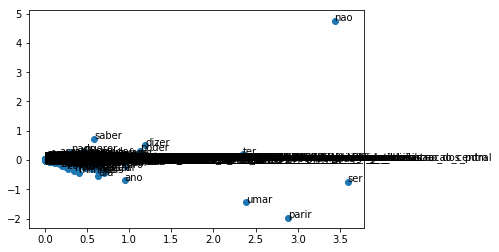

In [588]:
%matplotlib inline

plt.figure()
plt.scatter(dtm_lsa[:,0], dtm_lsa[:, 1])
for i, word in enumerate(vectorizer.get_feature_names()):
    plt.annotate(s = word, xy=dtm_lsa[i,:])
plt.show()